<a href="https://colab.research.google.com/github/avinashkumar18/Lab/blob/main/Deep%20Learning/Assessment%202/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Github](https://github.com/avinashkumar18/Lab/blob/main/Deep%20Learning/Assessment%202/Filter.ipynb)

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 
from PIL import Image as pl
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/content/sample_data/sample_image.jpg')

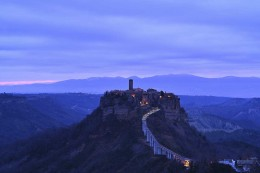

In [ ]:
cv2_imshow(image)

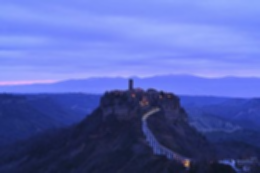

In [ ]:
# 3*3 box filter
im1=cv2.boxFilter(image,-1,(3,3))
cv2_imshow(im1)

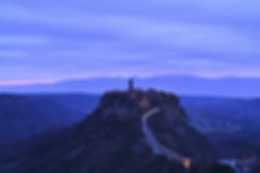

In [ ]:
# 5*5 box filter
im2=cv2.boxFilter(image,-1,(5,5))
cv2_imshow(im2)

In [ ]:
# resize image
temp_image = pl.open(r'/content/sample_data/sample_image.jpg') 
r_size = temp_image.resize((np.array((100,100))).astype(int))
temp_resize = np.asarray(r_size)

In [ ]:
im1=temp_resize.reshape(1,100,100,3)
im2=temp_resize.reshape(1,100,100,3)

In [ ]:
from keras.layers import Conv2D
from keras.models import Sequential

In [ ]:
def filter(image,kernel,strides,padding='valid'):
    conv=Sequential()
    conv.add(Conv2D(1,kernel_size=kernel,strides=strides,padding=padding,input_shape=(260,173,3)))
    y_cap=conv.predict(image)
    Y=y_cap.reshape(y_cap.shape[1],y_cap.shape[2])
    new_image=pl.fromarray(Y)
    return new_image

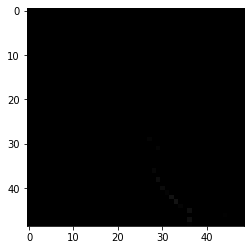

In [ ]:
im1_stride_2=filter(im1,(3,3),2)
plt.imshow(im1_stride_2)

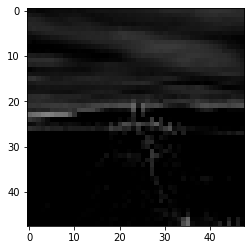

In [ ]:
im2_stride_2=filter(im2,(5,5),2)
plt.imshow(im2_stride_2)

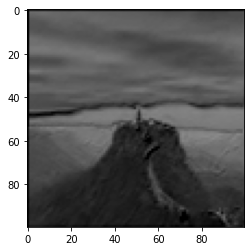

In [ ]:
img1_stride_1=filter(im1,(3,3),1,'same')
plt.imshow(img1_stride_1)

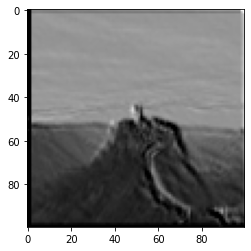

In [ ]:
img2_stride_1=filter(im2,(5,5),1,'same')
plt.imshow(img2_stride_1)

Entropy

In [ ]:
import skimage.measure 

In [ ]:
entropy1 = skimage.measure.shannon_entropy(image)
entropy2 = skimage.measure.shannon_entropy(im1)
entropy3 = skimage.measure.shannon_entropy(im2)
print(entropy1, entropy2, entropy3)

7.137513247287408 7.1039107521860485 7.1039107521860485


In [ ]:
entropy4 = skimage.measure.shannon_entropy(im1_stride_2)
entropy5 = skimage.measure.shannon_entropy(im2_stride_2)
entropy6 = skimage.measure.shannon_entropy(img1_stride_1)
entropy7 = skimage.measure.shannon_entropy(img2_stride_1)
print(entropy4, entropy5, entropy6, entropy7)

11.229419688230413 11.169925001442312 13.287512379549446 13.287112379549447
